In [6]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk, re, string
from string import punctuation
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
#machine learning
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
# machine learning
from sklearn.naive_bayes import MultinomialNB,GaussianNB
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vikranthbakkashetty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vikranthbakkashetty/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vikranthbakkashetty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/vikranthbakkashetty/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
  Using cached wordcloud-1.9.2.tar.gz (222 kB)
  Created wheel for wordcloud: filename=wordcloud-1.9.2-cp39-cp39-macosx_10_9_universal2.whl size=218053 sha256=ea434f358908d33824055229ba01edf676d0e2c578bcc082c9a1840fac055c73
  Stored in directory: /Users/vikranthbakkashetty/Library/Caches/pip/wheels/fd/79/b1/1e0a49160de8dfb17c54736cc73759e1d26f9343b61c0d5441
Successfully built wordcloud
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pandas numpy seaborn nltk matplotlib scikit-learn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pandas numpy seaborn nltk matplotlib scikit-learn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import nltk
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


2023-11-21 15:43:36.207 Python[1315:19185] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.


True

In [10]:
df = pd.read_csv('//Users/vikranthbakkashetty/Downloads/disaster_detection_from_tweets-main/disaster_tweets.csv')
df.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## Target Distribution

<Axes: ylabel='count'>

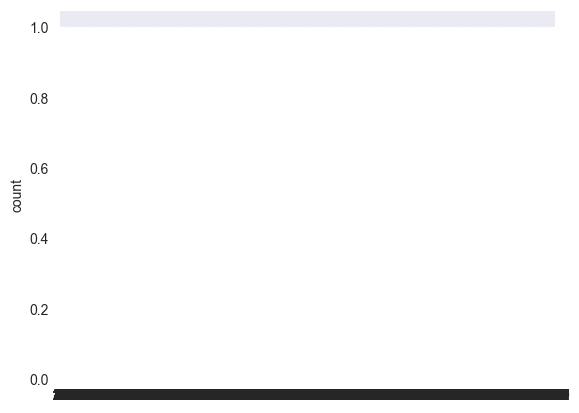

In [12]:
sns.set_style("dark")
sns.countplot(df.target)

In [13]:
# craeteing new column for storing length of reviews 
df['length'] = df['text'].apply(len)
df.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  length  
0       1      69  
1       1      38  
2       1     133  
3       1      65  
4       1      88

<Axes: ylabel='Frequency'>

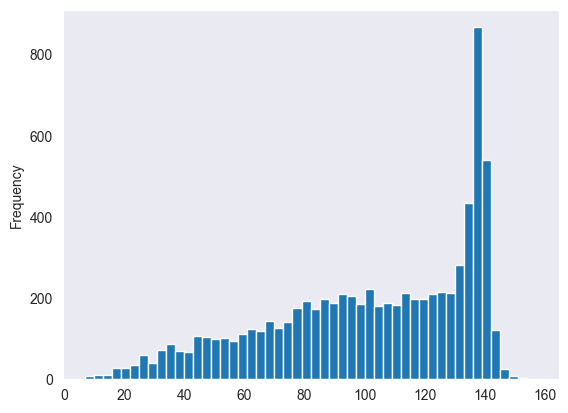

In [14]:
df['length'].plot(bins=50, kind='hist')

In [15]:
df.length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

In [16]:
df[df['length'] == 157]['text'].iloc[0]

"when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

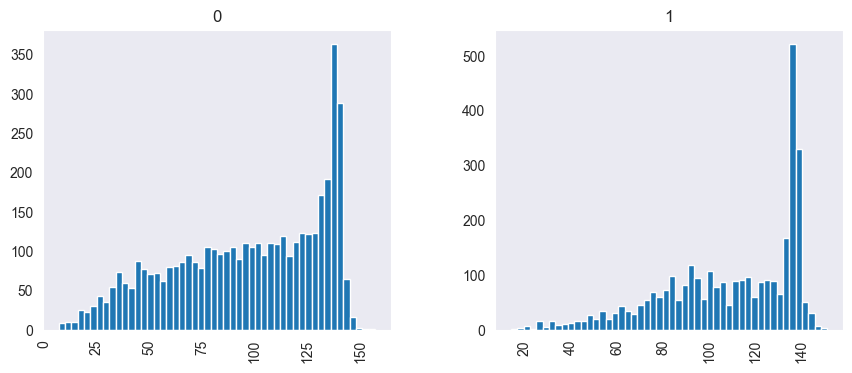

In [17]:
df.hist(column='length', by='target', bins=50,figsize=(10,4))

In [18]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# Removing stop words which are unneccesary from headline news
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df_1 = df[df['target']==1]
df_0 = df[df['target']==0]
df_1['text']=df_1['text'].apply(remove_stopwords)
df_0['text']=df_0['text'].apply(remove_stopwords)

/var/folders/fd/4wbpzjk54c5b1qd8l6bw0kb80000gn/T/ipykernel_1315/3205113125.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['text']=df_1['text'].apply(remove_stopwords)
/var/folders/fd/4wbpzjk54c5b1qd8l6bw0kb80000gn/T/ipykernel_1315/3205113125.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['text']=df_0['text'].apply(remove_stopwords)


## Plotting wordcloud of Disaster Tweets

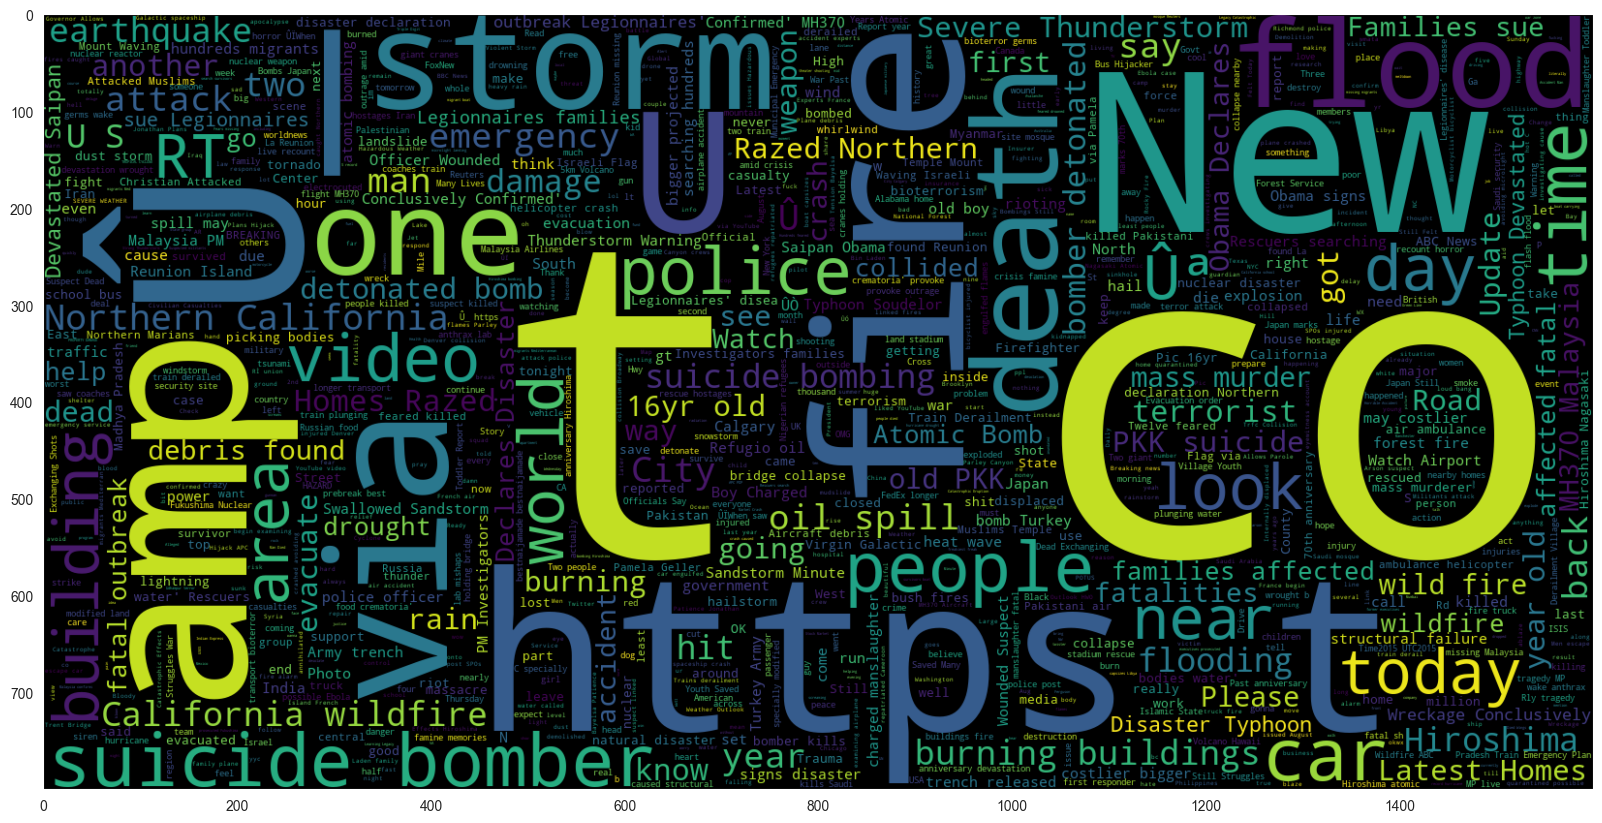

In [21]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Disaster tweets
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_1.text))
plt.imshow(wc , interpolation = 'bilinear')


## Plotting wordcloud of Normal Tweets

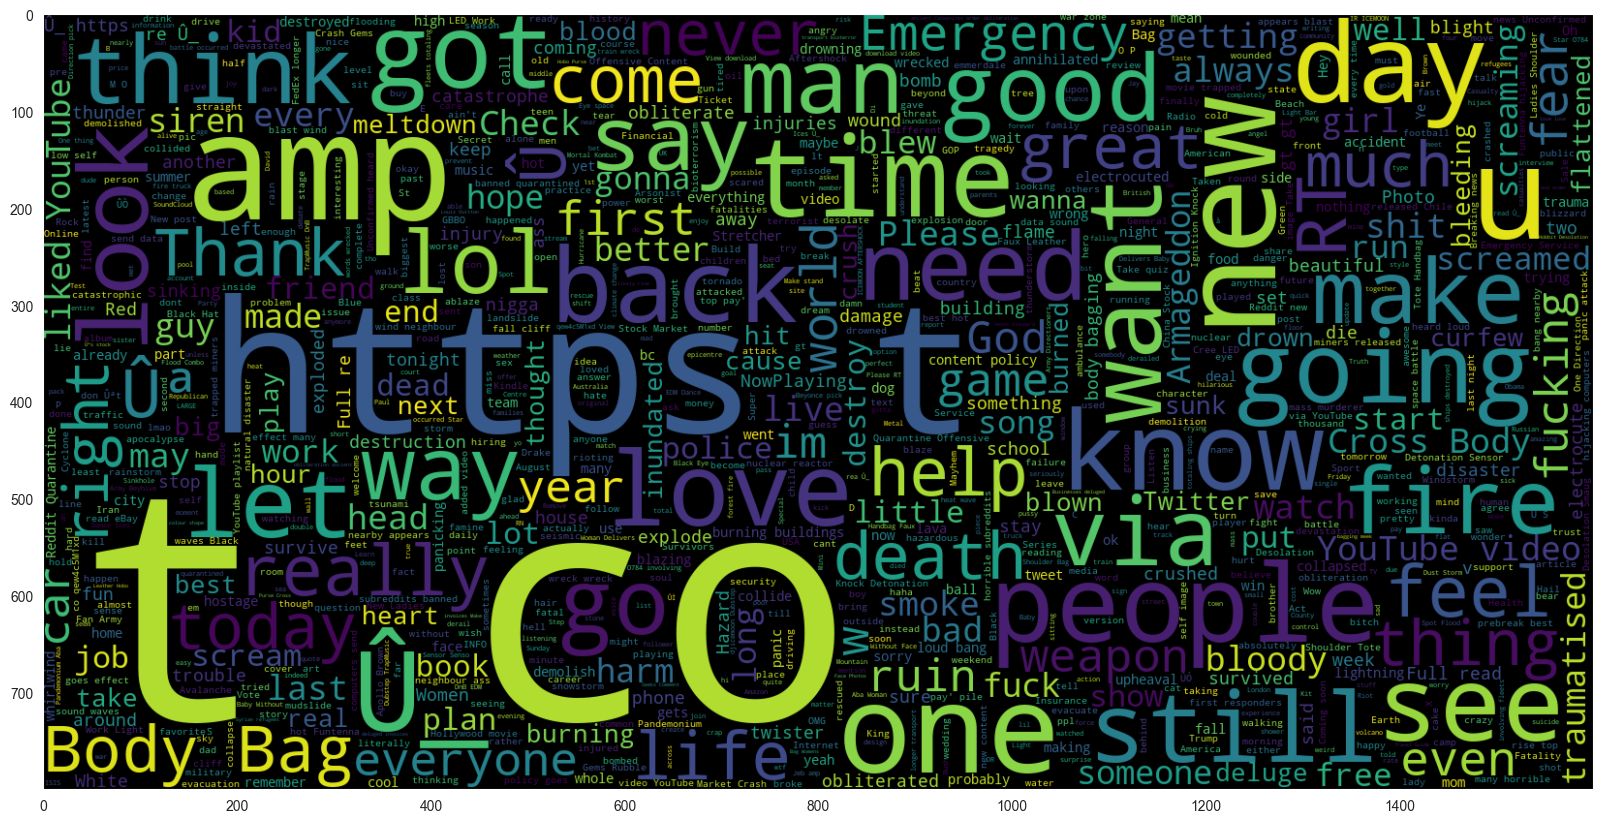

In [22]:
plt.figure(figsize = (20,20)) # Text that is Normal Tweets
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_0.text))
plt.imshow(wc , interpolation = 'bilinear')

## Data Cleaning and Preparation

In [23]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
#creating list of possible stopwords from nltk library
stop = stopwords.words('english')

def cleanTweet(txt):
  # lowercaing
    txt = txt.lower()
    # tokenization
    words = nltk.word_tokenize(txt)
  # removing stopwords & mennatizing the words
    words = ' '.join([lemma.lemmatize(word) for word in words if word not in (stop)])
    text = "".join(words)
  # removing non-alphabetic characters
    txt = re.sub('[^a-z]',' ',text)
    return txt  


## Applying Clean Tweet Function on Tweets Text

In [24]:
df['cleaned_tweets'] = df['text'].apply(cleanTweet)
df.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  length                                     cleaned_tweets  
0       1      69       deed reason   earthquake may allah forgive u  
1       1      38            forest fire near la ronge sask   canada  
2       1     133  resident asked  shelter place   notified offic...  
3       1      65         people receive   wildfire evacuation or...  
4       1      88  got sent photo ruby   alaska smoke   wildfire ...

## Creating Feature & Target Variables

In [25]:
y = df.target
X=df.cleaned_tweets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)

## TF-IDF Vectorizer - Bi-Gram

In [27]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

## Multinomial Naive Bayes

In [28]:
## Model Fitting
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)



MultinomialNB()

## 10-Fold Cross Validation

In [29]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_mnb2 = cross_val_score(estimator = mnb_tf, X = tfidf_train_2, y = y_train, cv = kfold,scoring=scoring)
acc_mnb2.mean()

0.7922824302134648

## Model Prediction Test set

Model  Accuracy  Precision  Sensitivity  \
0  Multinomial Naive Bayes - TFIDF-Bigram  0.800394   0.858607     0.640673   

   Specificity  F1 Score  
0     0.920598    0.7338

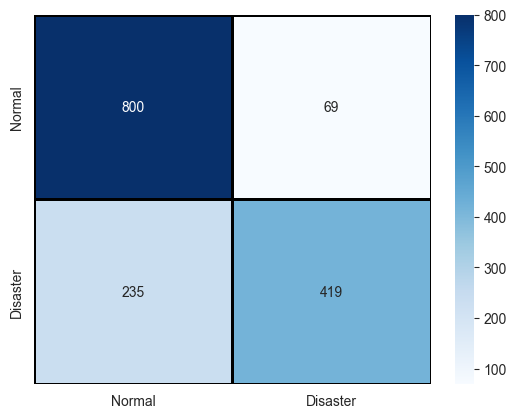

In [30]:
pred_mnb2 = mnb_tf.predict(tfidf_test_2)
CM=confusion_matrix(y_test,pred_mnb2)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)

acc= accuracy_score(y_test, pred_mnb2)

prec = precision_score(y_test, pred_mnb2)
rec = recall_score(y_test, pred_mnb2)
f1 = f1_score(y_test, pred_mnb2)


model_results =pd.DataFrame([['Multinomial Naive Bayes - TFIDF-Bigram',acc, prec,rec,specificity, f1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])

model_results

## Passive Aggressive Classifier

In [31]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)

PassiveAggressiveClassifier()

## 10-Fold Cross Validation

In [32]:

kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_pass2 = cross_val_score(estimator = pass_tf, X = tfidf_train_2, y = y_train, cv = kfold,scoring=scoring)
acc_pass2.mean()

0.78752052545156

## Model Prediction

AttributeError: 'DataFrame' object has no attribute 'append'

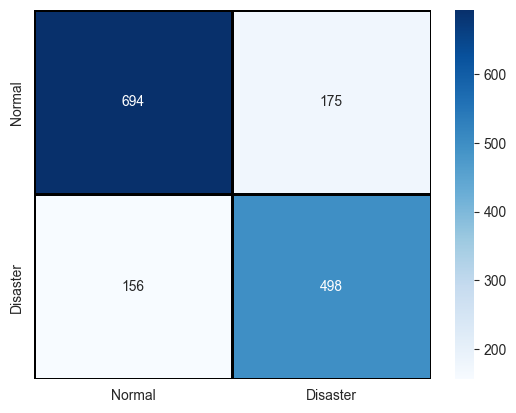

In [33]:
pred_pass2 = pass_tf.predict(tfidf_test_2)
CM=confusion_matrix(y_test,pred_pass2)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

acc = accuracy_score(y_test, pred_pass2)
prec = precision_score(y_test, pred_pass2)
rec = recall_score(y_test, pred_pass2)
f1 = f1_score(y_test, pred_pass2)

results =pd.DataFrame([['Passive Aggressive Classifier - TFIDF-Bigram',acc, prec,rec,specificity, f1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])
results = model_results.append(results, ignore_index = True)
results

## TF-IDF Vectorizer - Tri Gram

In [34]:
tfidf_vectorizer_3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer_3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer_3.transform(X_test)

## Multinomial Naive Bayes - Tri Gram

In [35]:
mnb_tf3 = MultinomialNB()
mnb_tf3.fit(tfidf_train_3, y_train)

MultinomialNB()

## 10-fold cross validation

In [36]:
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_mnb3 = cross_val_score(estimator = mnb_tf, X = tfidf_train_3, y = y_train, cv = kfold,scoring=scoring)
acc_mnb3.mean()

0.7845648604269294

## Model Prediction

AttributeError: 'DataFrame' object has no attribute 'append'

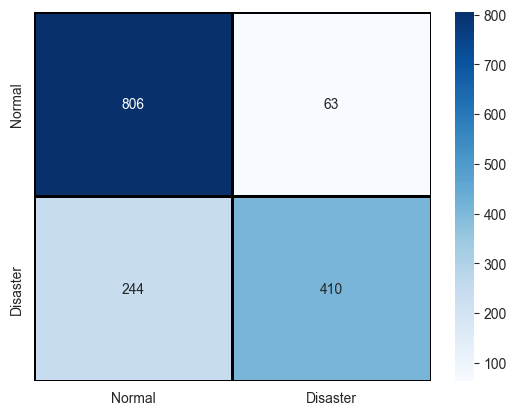

In [37]:
pred_mnb3 = mnb_tf3.predict(tfidf_test_3)
CM=confusion_matrix(y_test,pred_mnb3)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

acc = accuracy_score(y_test, pred_mnb3)
prec = precision_score(y_test, pred_mnb3)
rec = recall_score(y_test, pred_mnb3)
f1 = f1_score(y_test, pred_mnb3)

mod_results =pd.DataFrame([['Multinomial Naive Bayes - TFIDF-Trigram',acc, prec,rec,specificity, f1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])
results = results.append(mod_results, ignore_index = True)
results

## Passive Aggressive Classifier - Tri Gram

In [38]:
pass_tf3 = PassiveAggressiveClassifier()
pass_tf3.fit(tfidf_train_3, y_train)

## cross validation
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_pass3 = cross_val_score(estimator = pass_tf3, X = tfidf_train_3, y = y_train, cv = kfold,scoring=scoring)
acc_pass3.mean()

0.7889983579638752

AttributeError: 'DataFrame' object has no attribute 'append'

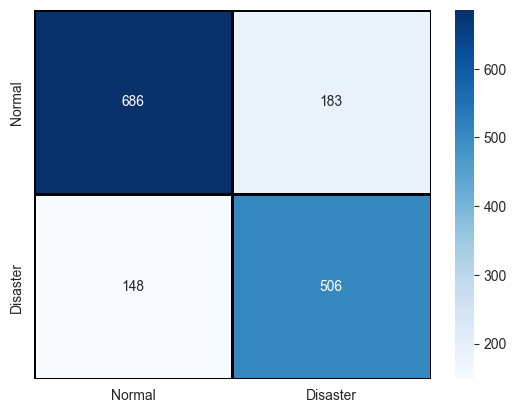

In [39]:
pred_pass3 = pass_tf3.predict(tfidf_test_3)
CM=confusion_matrix(y_test,pred_pass3)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

acc = accuracy_score(y_test, pred_pass3)
prec = precision_score(y_test, pred_pass3)
rec = recall_score(y_test, pred_pass3)
f1 = f1_score(y_test, pred_pass3)

mod1_results =pd.DataFrame([['Passive Aggressive Classifier - TFIDF-Trigram',acc, prec,rec,specificity, f1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])
results = results.append(mod1_results, ignore_index = True)
results

## Most Informative Features

In [40]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names_out()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)

In [41]:
most_informative_feature_for_binary_classification(tfidf_vectorizer_3, pass_tf3, n=10)

0 -2.2664893961260404 let
0 -2.056903483811844 bag
0 -2.0051397671837017 traumatised
0 -1.9743847806011048 love
0 -1.9610854934556574 new
0 -1.8866464946938264 suicide bomb
0 -1.8002112556341867 ruin
0 -1.7709726624777475 hrqcjdovjz
0 -1.7709726624777475 http hrqcjdovjz
0 -1.7709726624777475 mishap http hrqcjdovjz

1 4.065607389912036 http
1 3.927076656191679 hiroshima
1 3.488818629674546 california
1 3.110977976454728 wildfire
1 3.105919557372538 train
1 3.0168615600655797 forest
1 2.905898487662513 building
1 2.8507777480252554 flood
1 2.791419367121792 bombing
1 2.5314507975184224 japan


In [42]:
most_informative_feature_for_binary_classification(tfidf_vectorizer, mnb_tf, n=10)

AttributeError: 'MultinomialNB' object has no attribute 'coef_'

## Sample prediction

In [43]:
sentences = [
  "Just happened a terrible car crash",
    "Heard about #earthquake is different cities, stay safe everyone.",
    "No I don't like cold!",
    "@RosieGray Now in all sincerety do you think the UN would move to Israel if there was a fraction of a chance of being annihilated?"
  ]

tfidf_trigram = tfidf_vectorizer_3.transform(sentences)


predictions = pass_tf3.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label==1:
        target="Disaster Tweet"
        print("text:", text, "\nClass:", target)
        print()
    else:
        target="Normal Tweet"
        print("text:", text, "\nClass:", target)
        print()

text: Just happened a terrible car crash 
Class: Disaster Tweet

text: Heard about #earthquake is different cities, stay safe everyone. 
Class: Disaster Tweet

text: No I don't like cold! 
Class: Normal Tweet

text: @RosieGray Now in all sincerety do you think the UN would move to Israel if there was a fraction of a chance of being annihilated? 
Class: Normal Tweet



In [44]:
pip install gradio


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 16.5 MB 3.5 MB/s eta 0:00:01
  Using cached fastapi-0.104.1-py3-none-any.whl (92 kB)
     |████████████████████████████████| 133 kB 9.0 MB/s eta 0:00:01
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl (15 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)
     |████████████████████████████████| 59 kB 23.1 MB/s eta 0:00:01
  Using cached python_multipart-0.0.6-py3-none-any.whl (45 kB)
     |████████████████████████████████| 241 kB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 311 kB 10.8 MB/s eta 0:00:01
  Using cached tomlkit-0.12.0-py3-none-any.whl (37 kB)
     |████████████████████████████████| 62 kB 6.9 MB/s  eta 0:00:01
     |████████████████████████████████| 174 kB 31.7 MB/s eta 0:00:01
  Using cached gradio_client-0.7.0-py3-none-any.whl (302 kB)
  Using cached typer-0.9.0-py3-none-any.whl (45 kB)
  Using cached altair-5.1.2-py3

In [45]:
pip install gradio tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 208.8 MB 24.1 MB/s eta 0:00:01
     |████████████████████████████████| 394 kB 23.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 23.3 MB/s eta 0:00:01
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached libclang-16.0.6-py2.py3-none-macosx_11_0_arm64.whl (20.6 MB)
     |████████████████████████████████| 2.7 MB 9.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 14.5 MB/s eta 0:00:01
     |████████████████████████████████| 9.6 MB 31.5 MB/s eta 0:00:01
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
     |████████████████████████████████| 1.7 MB 20.6 MB/s eta 0:00:01
     |████████████████████████████████| 441 kB 20.5 MB/s eta 0:00:01
  Usi

In [61]:
import gradio as gr



def sample_prediction(inputs):
    Accuracy= '97%'
    
    # Split the input text into separate sentences
     
    sentences = inputs.split('\n')
    tfidf_trigram = tfidf_vectorizer_3.transform(sentences)
    predictions = pass_tf3.predict(tfidf_trigram)
    results = [" Disaster Tweet " if prediction == 1 else " Normal Tweet " for prediction in predictions]
    return results, Accuracy

iface = gr.Interface(
    fn=sample_prediction,
   
    inputs=gr.Textbox(label="Enter Sentences (separate by newline)", type="text"),
    outputs=[
        gr.Textbox(label="Results"),
        gr.Textbox(label="Accuracy")
    ],
    title="Tweet Classifier",
    description="Enter multiple sentences (separate by newline) and get predictions."
)

iface.launch(share=True)


Running on local URL:  http://127.0.0.1:7868
Running on public URL: https://55aa3e383d0d9d035b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
